# Support Vector Machine

Support vector machines with $K > 2$ classes are broken into two "flavours":
- **one-versus-rest**: Fit a separate SVM for each class against the rest, and classify according to the highest score.
- **one-versus-one**: Fit a separate SVM for each pair of classes, and classify according to the class that wins the most.

We choose to focus on one-versus-rest, because it fits fewer models (thus fewer parameters).

## Setup

In [1]:
from sklearn.svm import SVC

from tune import (
    Categorical,
    Constant,
    Integer,
    outer_cv,
    Real,
    SKBayesTuner,
)

## Search Space

For tuning, `sklearn` provides us 4 kernels, each slightly differently parameterized.
Of these, we consider the linear, polynomial, and radial basis function kernels.
The sigmoid kernel is [never guaranteed to be positive semi-definite](https://search.r-project.org/CRAN/refmans/kernlab/html/dots.html) so we avoid using it. Moreover, the linear kernel is just a special case of the polynomial kernel (`degree = 1`, `gamma = 1`, `coef0 = 0`) so we can specify it together with the polynomial kernel.

In [2]:
space = [
    dict(
        # constants
        probability=True,
        random_state=441,
        decision_function_shape="ovr",

        kernel=Constant("poly"),
        # variables
        degree=Integer(low=2, high=5, prior="log-uniform"),
        C=Real(low=1e-4, high=1e4, prior="log-uniform"),
        gamma=Real(low=1e-3, high=1e3, prior="log-uniform"),
        coef0=Categorical([0.0, 1.0]),  # effect of coef0 scales with gamma
    ), 
    dict(
        # constants
        probability=True,
        random_state=441,
        decision_function_shape="ovr",
        
        kernel=Constant("rbf"),
        # variables
        C=Real(low=1e-4, high=1e4, prior="log-uniform"),
        gamma=Real(low=1e-3, high=1e3, prior="log-uniform"),
    ),
]

## Base

[INFO/MainProcess] 1  Cached result loaded from ../models/support_vector_machine_base/cv-1.mdl
[INFO/MainProcess] 1  Best configuration: OrderedDict([('C', 10000.0), ('gamma', 0.05466338359788187), ('kernel', 'rbf')])
[INFO/MainProcess] 1  Accuracy: 0.976303317535545
[INFO/MainProcess] 2  Cached result loaded from ../models/support_vector_machine_base/cv-2.mdl
[INFO/MainProcess] 2  Best configuration: OrderedDict([('C', 33.799567700833975), ('gamma', 0.02812142328259727), ('kernel', 'rbf')])
[INFO/MainProcess] 2  Accuracy: 0.985781990521327
[INFO/MainProcess] 3  Cached result loaded from ../models/support_vector_machine_base/cv-3.mdl
[INFO/MainProcess] 3  Best configuration: OrderedDict([('C', 259.59381351819434), ('gamma', 0.0021449225754789835), ('kernel', 'rbf')])
[INFO/MainProcess] 3  Accuracy: 0.943127962085308
[INFO/MainProcess] 4  Cached result loaded from ../models/support_vector_machine_base/cv-4.mdl
[INFO/MainProcess] 4  Best configuration: OrderedDict([('C', 769.707175048784

<Figure size 1000x1000 with 0 Axes>

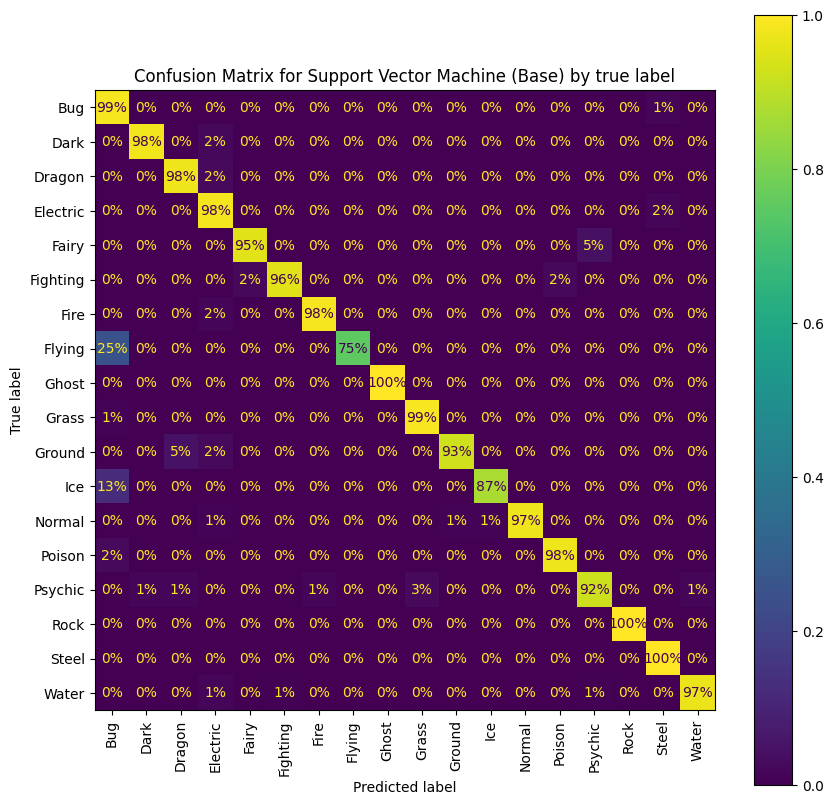

<Figure size 1000x1000 with 0 Axes>

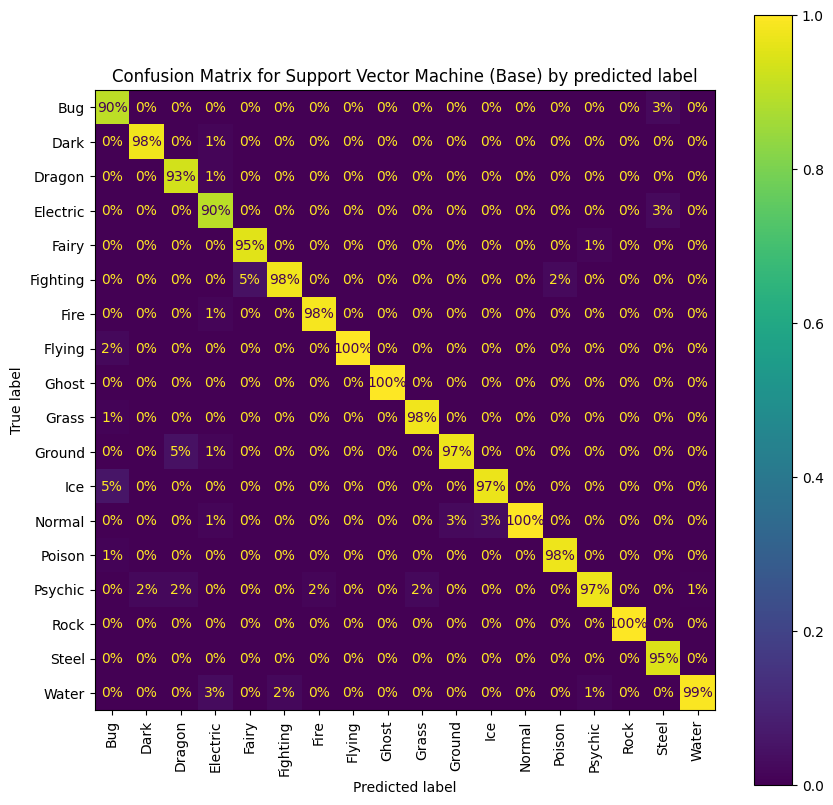

0.9686887835703001

In [3]:
outer_cv(
    tuner=SKBayesTuner(SVC, duplicate=False),
    search=space,
    name="SVM",
    duplicate=False,
    hard_mode=False,
)

## Hard

[INFO/MainProcess] 1  Cached result loaded from ../models/support_vector_machine_hard/cv-1.mdl
[INFO/MainProcess] 1  Best configuration: OrderedDict([('C', 89.71850496297965), ('coef0', 1.0), ('degree', 3), ('gamma', 8.412393358105263), ('kernel', 'poly')])
[INFO/MainProcess] 1  Accuracy: 0.43601895734597157
[INFO/MainProcess] 2  Cached result loaded from ../models/support_vector_machine_hard/cv-2.mdl
[INFO/MainProcess] 2  Best configuration: OrderedDict([('C', 18.132199930816842), ('gamma', 0.2660325519924625), ('kernel', 'rbf')])
[INFO/MainProcess] 2  Accuracy: 0.46919431279620855
[INFO/MainProcess] 3  Cached result loaded from ../models/support_vector_machine_hard/cv-3.mdl
[INFO/MainProcess] 3  Best configuration: OrderedDict([('C', 119.9746839211966), ('gamma', 0.12019166717711681), ('kernel', 'rbf')])
[INFO/MainProcess] 3  Accuracy: 0.44549763033175355
[INFO/MainProcess] 4  Cached result loaded from ../models/support_vector_machine_hard/cv-4.mdl
[INFO/MainProcess] 4  Best configur

<Figure size 1000x1000 with 0 Axes>

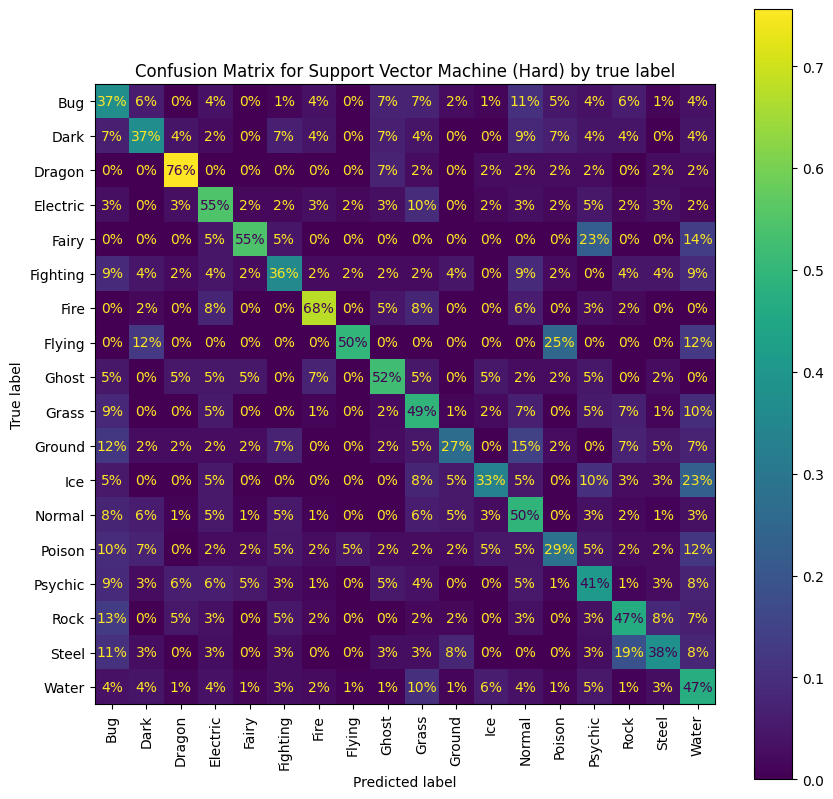

<Figure size 1000x1000 with 0 Axes>

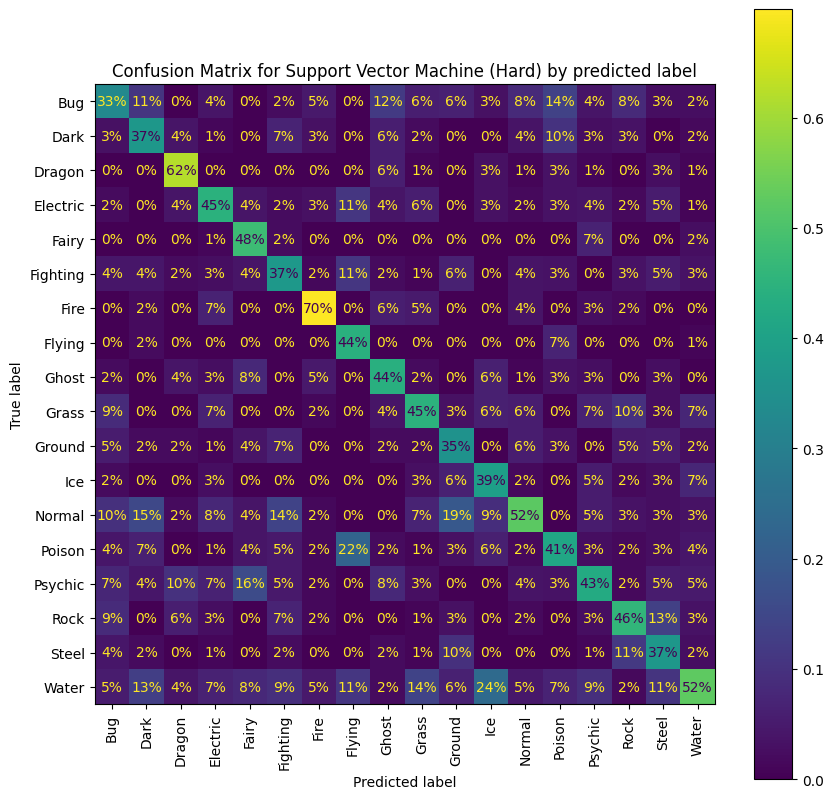

0.46206273978785833

In [4]:
outer_cv(
    tuner=SKBayesTuner(SVC, duplicate=False),
    search=space,
    name="SVM",
    duplicate=False,
    hard_mode=True,
)

## Duplication

In [ ]:
outer_cv(
    tuner=SKBayesTuner(SVC, duplicate=True),
    search=space,
    name="SVM",
    duplicate=True,
    hard_mode=False,
)

## Duplication, Hard

In [4]:
outer_cv(
    tuner=SKBayesTuner(SVC, duplicate=True),
    search=space,
    name="SVM",
    duplicate=True,
    hard_mode=True,
)

Outer CV using 1 cores


/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[INFO/LokyProcess-3] child process calling self.run()
[INFO/LokyProcess-4] child process calling self.run()
[INFO/LokyProcess-1] child process calling self.run()
[INFO/LokyProcess-2] child process calling self.run()
[INFO/LokyProcess-5] child process calling self.run()


KeyboardInterrupt: 